In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#loading WDC-EDML tiepoints and new WD layercount
wdc_edml_tiepoints = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/Tiepoints/WDC-EDML_WDC-EDC_WDC-TALDICE.xlsx', sheet_name=1, skiprows=37, usecols= [0,1,2,3], names=['WDC m', 'EDML m', 'WD2014 age', 'AICC2012 age'])
new_wdc_count = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/WD LC/Updated_WD2014 Layer Count.tab', sep='\t', comment='#', names=['depth', 'age'])
wdc_edml_tiepoints['new_wdc age'] = np.interp(wdc_edml_tiepoints['WDC m'], new_wdc_count['depth'], new_wdc_count['age']*1000)

#remove values irrelevant
wdc_edml_tiepoints = wdc_edml_tiepoints[np.logical_and(wdc_edml_tiepoints['new_wdc age'] < 3800, wdc_edml_tiepoints['AICC2012 age'] < 3800, wdc_edml_tiepoints['WD2014 age'] < 3800)]

#loading EDML new layercount
EDML_reset_depth = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/EDML-GICC Errors/EDML_LayerCount_Revised.txt', sep='\t', comment='#')
EDML_reset_depth

#load EDML original layercount
edml_gicc05 = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/Data Files/EDML Layer Count.xlsx', sheet_name=0, skiprows=1, usecols=[0,1])
edml_gicc05['yr b1950'] = edml_gicc05['Year b2k'] - 50

edml_half = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/Data Files/EDML Layer Count.xlsx', sheet_name=1, skiprows=1)
edml_half['yr b1950'] = edml_half['Year b2k'] - 50

old_wdc_count = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/WDC/WD2014 Layer Count.tab', sep='\t', skiprows=52)


#grip tiepoints
grip_wdc_ties = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/GRIP-WDC/iceice_synchro_horizons.txt', sep='\t', comment='#')

Text(0.5, 1.0, 'WDC-EDML New LC Age Diffs')

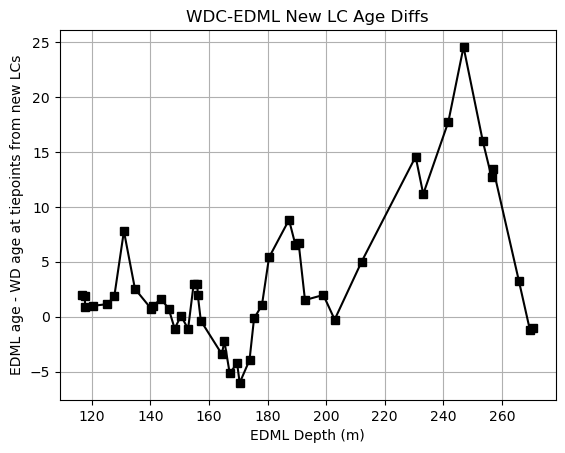

In [4]:
#New LC comparison

wdc_edml_tiepoints['closest_edml_lc_age'] = np.round(np.interp(wdc_edml_tiepoints['EDML m'], EDML_reset_depth['Depth (m)'], EDML_reset_depth['age (b1950)']))

wdc_edml_tiepoints['age_diff'] = wdc_edml_tiepoints['closest_edml_lc_age'] - wdc_edml_tiepoints['new_wdc age']


plot_diff = wdc_edml_tiepoints[wdc_edml_tiepoints['EDML m'] < 272.3].copy(deep=True)

plt.plot(plot_diff['EDML m'], plot_diff['age_diff'], marker='s', linestyle='-', color='k')
plt.ylabel('EDML age - WD age at tiepoints from new LCs')
plt.xlabel('EDML Depth (m)')
plt.grid()
plt.title('WDC-EDML New LC Age Diffs')

Text(0.5, 1.0, 'WDC-EDML(gicc) OLD LC Age Diffs')

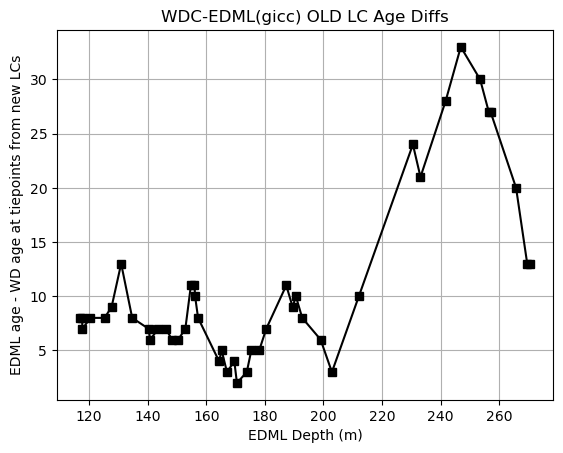

In [5]:
#old LC comparison1

wdc_edml_tiepoints['closest_edml_half_age'] = np.round(np.interp(wdc_edml_tiepoints['EDML m'], edml_half['Depth (m)'], edml_half['yr b1950']))

wdc_edml_tiepoints['closest_edml_gicc_age'] = np.round(np.interp(wdc_edml_tiepoints['EDML m'], edml_gicc05['Depth (m)'], edml_gicc05['yr b1950']))

wdc_edml_tiepoints['closest_old_wdc_age'] = np.round(np.interp(wdc_edml_tiepoints['WDC m'], old_wdc_count['#Depth ice/snow [m]'], 1000*old_wdc_count['Cal age [ka BP] (ice age)']))

#####
wdc_edml_tiepoints['age_diff'] = wdc_edml_tiepoints['closest_edml_gicc_age'] - wdc_edml_tiepoints['closest_old_wdc_age']
plot_diff2 = wdc_edml_tiepoints[wdc_edml_tiepoints['EDML m'] < 272.3].copy(deep=True)
#####

plt.plot(plot_diff2['EDML m'], plot_diff2['age_diff'], marker='s', linestyle='-', color='k')
plt.ylabel('EDML age - WD age at tiepoints from new LCs')
plt.xlabel('EDML Depth (m)')
plt.grid()
plt.title('WDC-EDML(gicc) OLD LC Age Diffs')

Text(0.5, 1.0, 'WDC-EDML(gicc) OLD LC Age Diffs')

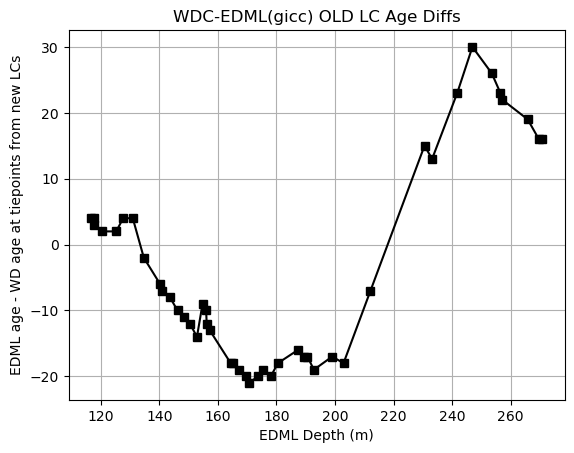

In [6]:
#old LC comparison2

wdc_edml_tiepoints['closest_edml_half_age'] = np.round(np.interp(wdc_edml_tiepoints['EDML m'], edml_half['Depth (m)'], edml_half['yr b1950']))

wdc_edml_tiepoints['closest_edml_gicc_age'] = np.round(np.interp(wdc_edml_tiepoints['EDML m'], edml_gicc05['Depth (m)'], edml_gicc05['yr b1950']))

wdc_edml_tiepoints['closest_old_wdc_age'] = np.round(np.interp(wdc_edml_tiepoints['WDC m'], old_wdc_count['#Depth ice/snow [m]'], 1000*old_wdc_count['Cal age [ka BP] (ice age)']))

#####
wdc_edml_tiepoints['age_diff'] = wdc_edml_tiepoints['closest_edml_half_age'] - wdc_edml_tiepoints['closest_old_wdc_age']
plot_diff3 = wdc_edml_tiepoints[wdc_edml_tiepoints['EDML m'] < 272.3].copy(deep=True)
#####

plt.plot(plot_diff3['EDML m'], plot_diff3['age_diff'], marker='s', linestyle='-', color='k')
plt.ylabel('EDML age - WD age at tiepoints from new LCs')
plt.xlabel('EDML Depth (m)')
plt.grid()
plt.title('WDC-EDML(gicc) OLD LC Age Diffs')

In [7]:
#load all GICC-EDML ties
ngrip_edml_ties = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/EDML-GICC Errors/EDML_GICC_Compare.xlsx', sheet_name=0, skiprows=0, usecols= [0,2], names=['EDML m', 'NGRIP m'])
grip_wdc_ties = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/WD LC/Modified_WDC_GICC_Compare.xlsx', sheet_name=0, skiprows=0, usecols= [0,1], names=['WDC m', 'GRIP m'])

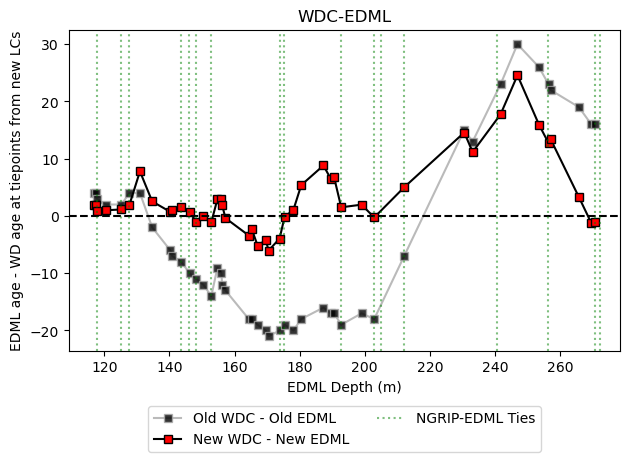

In [ ]:
plt.plot(plot_diff3['EDML m'], plot_diff3['age_diff'], marker='s', mfc='k', linestyle='-', alpha=0.8, color='darkgrey', label='Old WDC - Old EDML')
plt.plot(plot_diff['EDML m'], plot_diff['age_diff'], marker='s', mfc='r',linestyle='-', color='k', label='New WDC - New EDML')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel('EDML age - WD age at tiepoints from new LCs')
plt.xlabel('EDML Depth (m)')
plt.title('WDC-EDML')

for i, tie in enumerate(ngrip_edml_ties['EDML m']):
    if i == 0:
        plt.axvline(tie, color='green', linestyle=':', alpha=0.5 ,label='NGRIP-EDML Ties')
    else:
        plt.axvline(tie, color='green', linestyle=':', alpha=0.5)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.tight_layout()

In [13]:
grip_wdc_ties

,depth1,depth2,age_unc
0,139.38390,139.13650,20
1,143.15456,142.90114,20
2,181.31995,182.41005,20
3,187.29059,188.45998,20
4,205.99640,208.83713,20
...,...,...,...
93,1574.65890,1884.19680,100
94,1575.82780,1885.94640,100
95,1598.90120,1919.08130,100
96,1609.40660,1937.68330,100


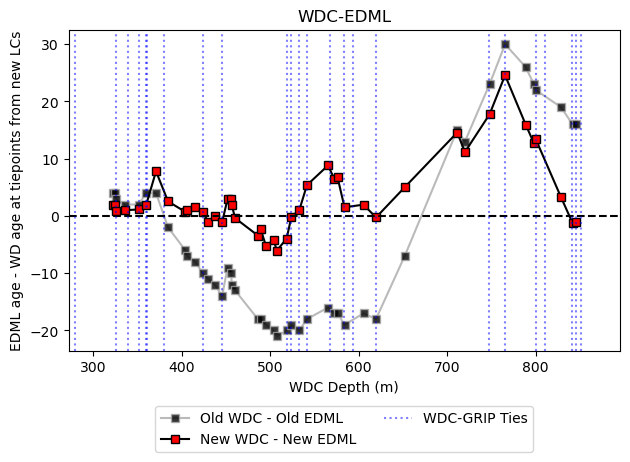

In [19]:
plt.plot(plot_diff3['WDC m'], plot_diff3['age_diff'], marker='s', mfc='k', linestyle='-', alpha=0.8, color='darkgrey', label='Old WDC - Old EDML')
plt.plot(plot_diff['WDC m'], plot_diff['age_diff'], marker='s', mfc='r',linestyle='-', color='k', label='New WDC - New EDML')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel('EDML age - WD age at tiepoints from new LCs')
plt.xlabel('WDC Depth (m)')
plt.title('WDC-EDML')

for i, tie in enumerate(grip_wdc_ties['depth2']):
    if i == 0:
        plt.axvline(tie, color='blue', linestyle=':', alpha=0.5 ,label='WDC-GRIP Ties')
    else:
        plt.axvline(tie, color='blue', linestyle=':', alpha=0.5)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlim(plot_diff['WDC m'].min()-50, plot_diff['WDC m'].max()+50)
plt.tight_layout()